<div style="float:left">
            <h1 style="width:450px">Libraries Kids and Single Parents Unemployment</h1>
            <h2 style="width:450px">Correlation and linear regression</h2>
</div>
<div style="float:right"><img width="100" src="https://github.com/jreades/i2p/raw/master/img/casa_logo.jpg" /></div>

## Part 2: Calculating correlation coefficients

### Libraries

In [183]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd

import statsmodels.formula.api as smf
import statsmodels

In [184]:
print("pandas version: {}".format(pd.__version__))
print("statsmodels version: {}".format(statsmodels.__version__))

pandas version: 2.2.2
statsmodels version: 0.14.2


### Downloading data (office environment)

In [185]:

df = pd.read_csv("/Users/victoriachen/Documents/My Baby Thesis/2nd_try/5_regression/Merged_Data_with_Income_and_POPDEN.csv")
combine = pd.read_csv("/Users/victoriachen/Documents/My Baby Thesis/2nd_try/3_nearest_lib_unchange/centroid to lib/CNL_output_data.csv")

df = df.merge(combine, on='MSOA11CD', how='left')

In [186]:
df.head()

,Unnamed: 0,MSOA11CD,count_sin,sum,count_sdep,sdep/sum,sdep/sin,library_name_sum,filtered_library_name_sum,keyword_frequency_sum,Total annual income,POPDEN,Nearest_Library_ID,Distance_to_Library
0,0,E02000001,90.0,4909.0,10.0,0.203707,11.111111,26.0,15.0,126.0,101800.0,25.5,71,101.659404
1,1,E02000002,436.0,2873.0,77.0,2.680125,17.660550,4.0,2.0,5.0,43600.0,31.3,5,399.090090
2,2,E02000003,414.0,3932.0,53.0,1.347915,12.801932,7.0,4.0,11.0,50900.0,46.9,4,404.618876
3,3,E02000004,178.0,2309.0,25.0,1.082720,14.044944,6.0,1.0,1.0,52000.0,24.8,164,1659.689546
4,4,E02000005,451.0,3629.0,85.0,2.342243,18.847007,6.0,2.0,8.0,48100.0,72.1,3,661.123499


In [187]:
# print the shape of the DataFrame
df.shape

(963, 14)

In [188]:
# print the column names
df.columns

Index(['Unnamed: 0', 'MSOA11CD', 'count_sin', 'sum', 'count_sdep', 'sdep/sum',
       'sdep/sin', 'library_name_sum', 'filtered_library_name_sum',
       'keyword_frequency_sum', 'Total annual income', 'POPDEN',
       'Nearest_Library_ID', 'Distance_to_Library'],
      dtype='object')

In [189]:
 df = df.drop(columns=['MSOA11CD', 'Unnamed: 0' ])

 df.head()

,count_sin,sum,count_sdep,sdep/sum,sdep/sin,library_name_sum,filtered_library_name_sum,keyword_frequency_sum,Total annual income,POPDEN,Nearest_Library_ID,Distance_to_Library
0,90.0,4909.0,10.0,0.203707,11.111111,26.0,15.0,126.0,101800.0,25.5,71,101.659404
1,436.0,2873.0,77.0,2.680125,17.660550,4.0,2.0,5.0,43600.0,31.3,5,399.090090
2,414.0,3932.0,53.0,1.347915,12.801932,7.0,4.0,11.0,50900.0,46.9,4,404.618876
3,178.0,2309.0,25.0,1.082720,14.044944,6.0,1.0,1.0,52000.0,24.8,164,1659.689546
4,451.0,3629.0,85.0,2.342243,18.847007,6.0,2.0,8.0,48100.0,72.1,3,661.123499


In [190]:
df = df.rename(columns={
    'library_name_sum': 'lib',
    'filtered_library_name_sum': 'kid', 
    'keyword_frequency_sum': 'frequency',
    'count_sdep': 'sdep',
    'sdep/sum': 'sdep_sum',
    'sdep/sin': 'sdep_sin', 
    'Total annual income': 'income',
    'Distance_to_Library': 'distance'
})

print(df.columns)

Index(['count_sin', 'sum', 'sdep', 'sdep_sum', 'sdep_sin', 'lib', 'kid',
       'frequency', 'income', 'POPDEN', 'Nearest_Library_ID', 'distance'],
      dtype='object')


In [191]:
df = df.dropna()
print(df)

     count_sin     sum   sdep  sdep_sum   sdep_sin   lib   kid  frequency  \
0         90.0  4909.0   10.0  0.203707  11.111111  26.0  15.0      126.0   
1        436.0  2873.0   77.0  2.680125  17.660550   4.0   2.0        5.0   
2        414.0  3932.0   53.0  1.347915  12.801932   7.0   4.0       11.0   
3        178.0  2309.0   25.0  1.082720  14.044944   6.0   1.0        1.0   
4        451.0  3629.0   85.0  2.342243  18.847007   6.0   2.0        8.0   
..         ...     ...    ...       ...        ...   ...   ...        ...   
958      217.0  4189.0   16.0  0.381953   7.373272   7.0   6.0       24.0   
959      364.0  5087.0   55.0  1.081187  15.109890  10.0   2.0        9.0   
960      521.0  5267.0  105.0  1.993545  20.153551   8.0   1.0        2.0   
961      260.0  4227.0   50.0  1.182872  19.230769   9.0   2.0        4.0   
962      253.0  4137.0   34.0  0.821852  13.438735  12.0   3.0       12.0   

       income  POPDEN  Nearest_Library_ID     distance  
0    101800.0    2

## build regression models

In [169]:
reg_sdep_sum_fre = smf.ols(formula='sdep_sum ~ frequency + income + POPDEN',data=df).fit()

# And this gives a big summary of the results:
print(reg_sdep_sin_fre.summary())

                            OLS Regression Results                            
Dep. Variable:               sdep_sin   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     119.2
Date:                Wed, 04 Sep 2024   Prob (F-statistic):           1.36e-65
Time:                        05:04:00   Log-Likelihood:                -2477.0
No. Observations:                 963   AIC:                             4962.
Df Residuals:                     959   BIC:                             4982.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.5073      0.590     34.735      0.0

In [173]:
reg_sdep_sum_fre = smf.ols(formula='sdep_sum ~ frequency + sdep + POPDEN + income',data=df).fit()

# And this gives a big summary of the results:
print(reg_sdep_sum_fre.summary())

                            OLS Regression Results                            
Dep. Variable:               sdep_sum   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1704.
Date:                Wed, 04 Sep 2024   Prob (F-statistic):               0.00
Time:                        08:26:11   Log-Likelihood:                 72.628
No. Observations:                 963   AIC:                            -135.3
Df Residuals:                     958   BIC:                            -110.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0471      0.060     17.381      0.0

In [174]:
reg_sdep_sum_lib = smf.ols(formula='sdep_sum ~ lib + sdep + POPDEN + income',data=df).fit()

# And this gives a big summary of the results:
print(reg_sdep_sum_lib.summary())

                            OLS Regression Results                            
Dep. Variable:               sdep_sum   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1695.
Date:                Wed, 04 Sep 2024   Prob (F-statistic):               0.00
Time:                        08:40:31   Log-Likelihood:                 70.562
No. Observations:                 963   AIC:                            -131.1
Df Residuals:                     958   BIC:                            -106.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0617      0.060     17.684      0.0

In [176]:
reg_sdep_sum_lib = smf.ols(formula='sdep_sum ~ lib + POPDEN + income',data=df).fit()

# And this gives a big summary of the results:
print(reg_sdep_sum_lib.summary())

                            OLS Regression Results                            
Dep. Variable:               sdep_sum   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     335.6
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          5.98e-149
Time:                        08:59:52   Log-Likelihood:                -589.83
No. Observations:                 963   AIC:                             1188.
Df Residuals:                     959   BIC:                             1207.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3513      0.083     40.439      0.0

In [175]:
reg_sdep_sum_kid = smf.ols(formula='sdep_sum ~ kid + sdep + POPDEN + income',data=df).fit()

# And this gives a big summary of the results:
print(reg_sdep_sum_kid.summary())

                            OLS Regression Results                            
Dep. Variable:               sdep_sum   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1697.
Date:                Wed, 04 Sep 2024   Prob (F-statistic):               0.00
Time:                        08:41:21   Log-Likelihood:                 70.861
No. Observations:                 963   AIC:                            -131.7
Df Residuals:                     958   BIC:                            -107.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0596      0.060     17.648      0.0

In [177]:
reg_sdep_sum_kid = smf.ols(formula='sdep_sum ~ kid + POPDEN + income',data=df).fit()

# And this gives a big summary of the results:
print(reg_sdep_sum_kid.summary())

                            OLS Regression Results                            
Dep. Variable:               sdep_sum   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     324.6
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          2.06e-145
Time:                        09:00:20   Log-Likelihood:                -598.02
No. Observations:                 963   AIC:                             1204.
Df Residuals:                     959   BIC:                             1224.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3696      0.084     40.180      0.0

In [194]:
reg_sdep_sum_distance = smf.ols(formula='sdep_sum ~ distance + sdep + POPDEN + income',data=df).fit()

print(reg_sdep_sum_distance.summary())

                            OLS Regression Results                            
Dep. Variable:               sdep_sum   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1696.
Date:                Wed, 04 Sep 2024   Prob (F-statistic):               0.00
Time:                        12:32:02   Log-Likelihood:                 70.805
No. Observations:                 963   AIC:                            -131.6
Df Residuals:                     958   BIC:                            -107.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0392      0.065     16.089      0.0

In [24]:
reg_dep_sdep = smf.ols(formula='dep ~ sdep',data=df).fit()
print(reg_sdep_dep.summary())

                            OLS Regression Results                            
Dep. Variable:                   sdep   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     1819.
Date:                Sat, 31 Aug 2024   Prob (F-statistic):          1.39e-219
Time:                        00:50:36   Log-Likelihood:                -3699.0
No. Observations:                 916   AIC:                             7402.
Df Residuals:                     914   BIC:                             7412.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.3393      1.386    -10.346      0.0

In [126]:
reg_sdep_sum_lib = smf.ols(formula='sdep_sum ~ lib + income + POPDEN',data=df).fit()

# And this gives a big summary of the results:
print(reg_sdep_sum_lib.summary())

                            OLS Regression Results                            
Dep. Variable:               sdep_sum   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     335.6
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          5.98e-149
Time:                        04:34:23   Log-Likelihood:                -589.83
No. Observations:                 963   AIC:                             1188.
Df Residuals:                     959   BIC:                             1207.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3513      0.083     40.439      0.0

In [41]:
reg_sdep_sin_kidm = smf.ols(formula='sdep_sin ~ kidm + dep + POPDEN',data=df).fit()

# And this gives a big summary of the results:
print(reg_sdep_sin_kidm.summary())

                            OLS Regression Results                            
Dep. Variable:               sdep_sin   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     98.33
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           7.17e-55
Time:                        21:27:57   Log-Likelihood:                -2261.5
No. Observations:                 881   AIC:                             4531.
Df Residuals:                     877   BIC:                             4550.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4770      0.369     22.989      0.0

In [42]:
reg_sdep_sin_frem = smf.ols(formula='sdep_sin ~ frequencym  + dep + POPDEN',data=df).fit()

# And this gives a big summary of the results:
print(reg_sdep_sin_frem.summary())

                            OLS Regression Results                            
Dep. Variable:               sdep_sin   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     98.08
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           9.59e-55
Time:                        21:28:18   Log-Likelihood:                -2261.8
No. Observations:                 881   AIC:                             4532.
Df Residuals:                     877   BIC:                             4551.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.7872      0.347     25.332      0.0

In [43]:
reg_sdep_sin_frek = smf.ols(formula='sdep_sin ~ frequencyk + dep + POPDEN',data=df).fit()

# And this gives a big summary of the results:
print(reg_sdep_sin_frek.summary())

                            OLS Regression Results                            
Dep. Variable:               sdep_sin   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     101.0
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           3.67e-56
Time:                        21:28:25   Log-Likelihood:                -2258.5
No. Observations:                 881   AIC:                             4525.
Df Residuals:                     877   BIC:                             4544.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2692      0.336     27.566      0.0

In [45]:
reg_sdep_sin_fre = smf.ols(formula='sdep_sin ~ frequency + dep + POPDEN',data=df).fit()

# And this gives a big summary of the results:
print(reg_sdep_sin_fre.summary())

                            OLS Regression Results                            
Dep. Variable:               sdep_sin   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     102.2
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           9.69e-57
Time:                        21:28:57   Log-Likelihood:                -2257.2
No. Observations:                 881   AIC:                             4522.
Df Residuals:                     877   BIC:                             4541.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9058      0.338     26.331      0.0

In [69]:
reg_sdep_sum_frem = smf.ols(formula='sdep_sum ~ frequencym +  dep + POPDEN',data=df).fit()

# And this gives a big summary of the results:
print(reg_sdep_sum_frem.summary())

                            OLS Regression Results                            
Dep. Variable:               sdep_sum   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     235.7
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          3.91e-112
Time:                        22:03:43   Log-Likelihood:                -594.48
No. Observations:                 881   AIC:                             1197.
Df Residuals:                     877   BIC:                             1216.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1028      0.052      1.967      0.0

In [70]:
reg_sdep_sum_frek = smf.ols(formula='sdep_sum ~ frequencyk +  dep + POPDEN',data=df).fit()

# And this gives a big summary of the results:
print(reg_sdep_sum_frek.summary())

                            OLS Regression Results                            
Dep. Variable:               sdep_sum   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     237.2
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          1.15e-112
Time:                        22:04:47   Log-Likelihood:                -593.25
No. Observations:                 881   AIC:                             1194.
Df Residuals:                     877   BIC:                             1214.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0754      0.051      1.485      0.1

In [65]:
reg_sdep_sum_kidm = smf.ols(formula='sdep_sum ~ kidm + dep + POPDEN ',data=df).fit()

# And this gives a big summary of the results:
print(reg_sdep_sum_kidm.summary())

                            OLS Regression Results                            
Dep. Variable:               sdep_sum   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     245.5
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          1.27e-115
Time:                        22:00:57   Log-Likelihood:                -586.40
No. Observations:                 881   AIC:                             1181.
Df Residuals:                     877   BIC:                             1200.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1803      0.055      3.273      0.0

In [64]:
reg_sdep_sum_fre = smf.ols(formula='sdep_sum ~ frequency + dep + POPDEN ',data=df).fit()

# And this gives a big summary of the results:
print(reg_sdep_sum_fre.summary())

                            OLS Regression Results                            
Dep. Variable:               sdep_sum   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     236.9
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          1.50e-112
Time:                        22:00:54   Log-Likelihood:                -593.52
No. Observations:                 881   AIC:                             1195.
Df Residuals:                     877   BIC:                             1214.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0977      0.051      1.908      0.0

In [50]:
reg_frem_frek = smf.ols(formula='frequencyk ~ frequencym',data=df).fit()

# And this gives a big summary of the results:
print(reg_frem_frek.summary())

                            OLS Regression Results                            
Dep. Variable:             frequencyk   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     564.5
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           1.38e-99
Time:                        21:46:36   Log-Likelihood:                -4300.7
No. Observations:                1018   AIC:                             8605.
Df Residuals:                    1016   BIC:                             8615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.9925      0.929     -6.453      0.0

In [ ]:
reg_dep_fre = smf.ols(formula='dep ~ frequency',data=df).fit()

# And this gives a big summary of the results:
print(reg_dep_fre.summary())

                            OLS Regression Results                            
Dep. Variable:                    dep   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     52.73
Date:                Sat, 31 Aug 2024   Prob (F-statistic):           8.17e-13
Time:                        01:21:15   Log-Likelihood:                -5975.7
No. Observations:                 916   AIC:                         1.196e+04
Df Residuals:                     914   BIC:                         1.197e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    437.4567      8.936     48.953      0.0

Note that the **reg_wb_green** model contains a lot of information of the regression models (see [here](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults) for a full list), including:

- params: the coefficients of intercept and gradients (or slopes)
- rsqured
- pvalues
- fittedvalues: the fitted y values
- resid: residuals


In [34]:
# Pick out some values of interest and print the regression equation: y=mx+c or y=beta_1*x + beta_0

# The order of results: intercept term, slope term
beta_0, beta_1 = reg_dep_lib.params
rsq    = reg_dep_lib.rsquared
pval_0, pval_1 = reg_dep_lib.pvalues

print("y =", round(beta_1,3), "x +", round(beta_0,3))
print("R^2 = ", rsq)
print("p-value of library = ", round(pval_1,5))
print("p-value of intercept = ", round(pval_0,5))

y = 0.503 x + 13.705
R^2 =  0.002383307235748089
p-value of library =  0.39712
p-value of intercept =  0.0


In [43]:
beta_0, beta_1 = reg_dep_kid.params
rsq    = reg_dep_kid.rsquared
pval_0, pval_1 = reg_dep_kid.pvalues

print("y =", round(beta_1,3), "x +", round(beta_0,3))
print("R^2 = ", rsq)
print("p-value of kid = ", round(pval_1,5))
print("p-value of intercept = ", round(pval_0,5))

y = -0.174 x + 14.429
R^2 =  0.00036315973558276315
p-value of kid =  0.74111
p-value of intercept =  0.0


In [44]:
beta_0, beta_1 = reg_dep_fre.params
rsq    = reg_dep_fre.rsquared
pval_0, pval_1 = reg_dep_fre.pvalues

print("y =", round(beta_1,3), "x +", round(beta_0,3))
print("R^2 = ", rsq)
print("p-value of frequency = ", round(pval_1,5))
print("p-value of intercept = ", round(pval_0,5))

y = 0.013 x + 14.131
R^2 =  0.0010973537530025723
p-value of frequency =  0.5657
p-value of intercept =  0.0


In [45]:
beta_0, beta_1 = reg_dep_dis.params
rsq    = reg_dep_dis.rsquared
pval_0, pval_1 = reg_dep_dis.pvalues

print("y =", round(beta_1,3), "x +", round(beta_0,3))
print("R^2 = ", rsq)
print("p-value of distance = ", round(pval_1,5))
print("p-value of intercept = ", round(pval_0,5))

y = -0.001 x + 14.874
R^2 =  0.005238485327720643
p-value of distance =  0.03171
p-value of intercept =  0.0


# plot the result

y = 0.503 x + 13.705
Rsq =  0.002383307235748089
p-value of library =  0.3971166100338186


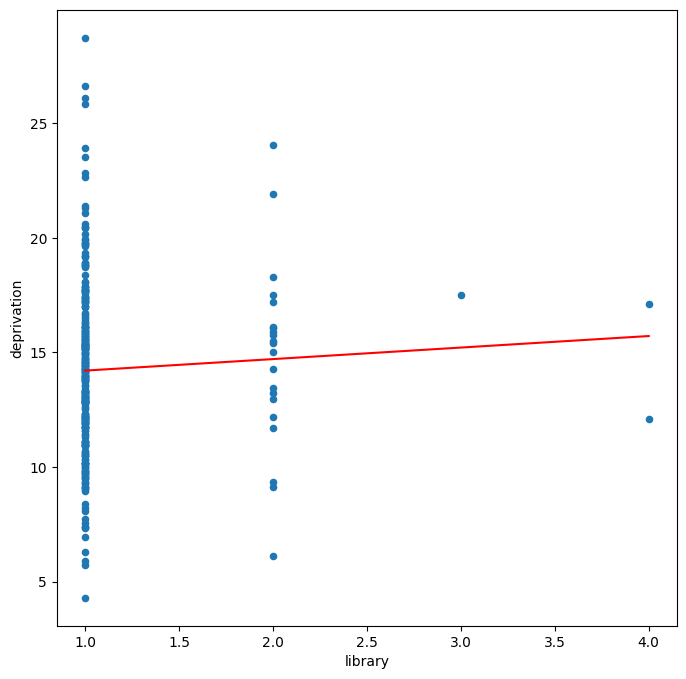

In [36]:

fig, ax = plt.subplots()
df_office.plot(kind='scatter', x='library', y='deprivation', figsize=(8, 8), ax = ax)

X=df_office.library
b = plt.plot(X, X*beta_1 + beta_0, 'r') # Plot the regression line.

print("y =", round(beta_1,3), "x +", round(beta_0,3))
print("Rsq = ", rsq)
print("p-value of library = ", pval_1)

y = -0.001 x + 14.874
Rsq =  0.005238485327720643
p-value of kid =  0.031709996343363994


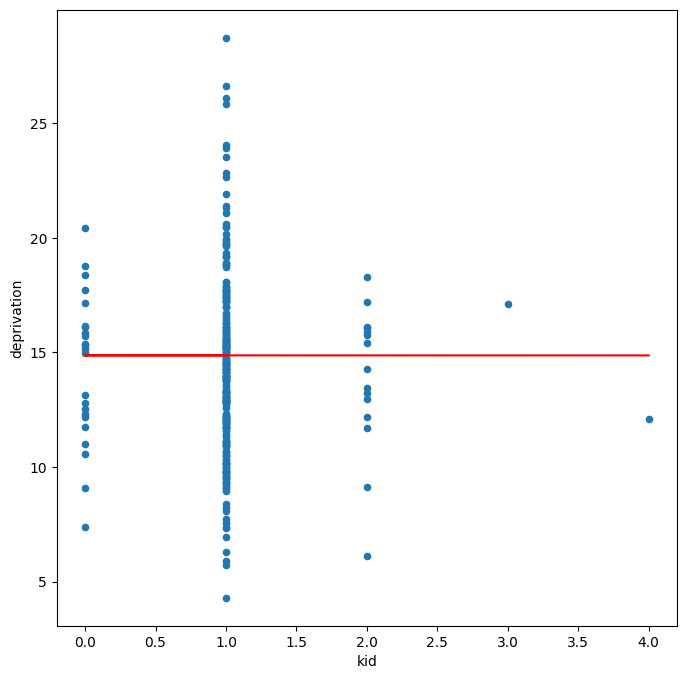

In [46]:
fig, ax = plt.subplots()
df_office.plot(kind='scatter', x='kid', y='deprivation', figsize=(8, 8), ax = ax)

X=df_office.kid
b = plt.plot(X, X*beta_1 + beta_0, 'r') # Plot the regression line.

print("y =", round(beta_1,3), "x +", round(beta_0,3))
print("Rsq = ", rsq)
print("p-value of kid = ", pval_1)

y = -0.001 x + 14.874
Rsq =  0.005238485327720643
p-value of frequency =  0.031709996343363994


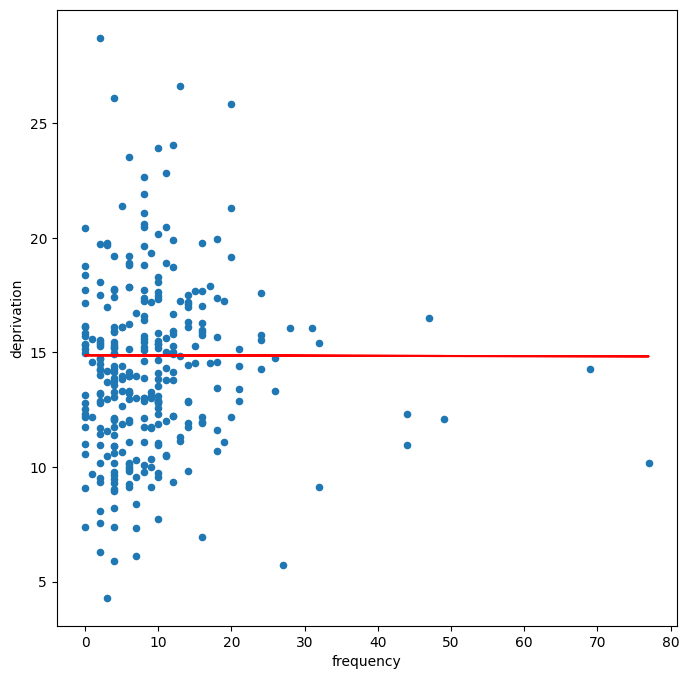

In [47]:
fig, ax = plt.subplots()
df_office.plot(kind='scatter', x='frequency', y='deprivation', figsize=(8, 8), ax = ax)

X=df_office.frequency
b = plt.plot(X, X*beta_1 + beta_0, 'r') # Plot the regression line.

print("y =", round(beta_1,3), "x +", round(beta_0,3))
print("Rsq = ", rsq)
print("p-value of frequency = ", pval_1)

y = -0.001 x + 14.874
Rsq =  0.005238485327720643
p-value of distance =  0.031709996343363994


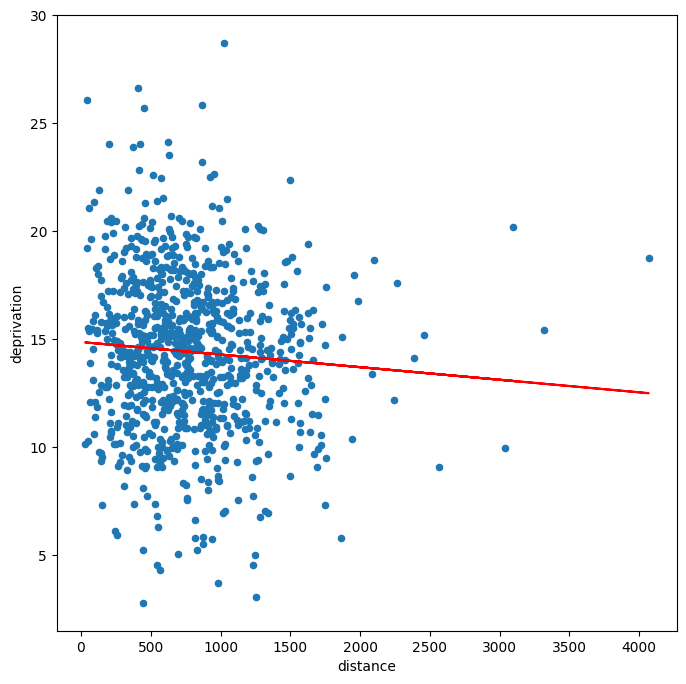

In [48]:
fig, ax = plt.subplots()
df_office.plot(kind='scatter', x='distance', y='deprivation', figsize=(8, 8), ax = ax)

X=df_office.distance
b = plt.plot(X, X*beta_1 + beta_0, 'r') # Plot the regression line.

print("y =", round(beta_1,3), "x +", round(beta_0,3))
print("Rsq = ", rsq)
print("p-value of distance = ", pval_1)

### Interpreting Model Coefficients


### How Well Does the Model Fit the data?

The most common way to evaluate the overall fitness of a linear model is by the R-squared value. 

R-squared is the proportion of variance explained, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the null model. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model.


In [23]:
# what is the R squared value for the model？You can find the answer from the code above.

reg_wb_green.rsquared

0.34523516578160884

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. 

Therefore, it's most useful as a tool for comparing different models.

### The LINE conditions of linear regression

Now, we can conduct residual analysis and test the following **LINE** conditions using **Residual vs. Fitted plot**:

- Linear relationship
- Independent errors
- Normally distributed errors
- Equal variance for all x values

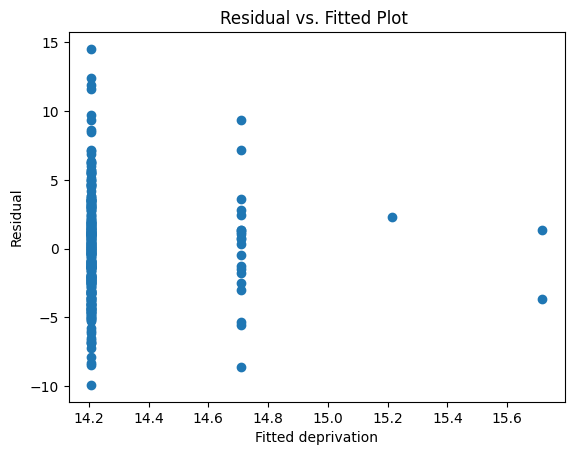

In [37]:
# plot 
plt.scatter(reg_dep_lib.fittedvalues, reg_dep_lib.resid)
# adding title and labels
plt.xlabel('Fitted deprivation')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot ')
plt.show()

Now, we can discuss the LINE conditions and outliers:

- Linear relationship between x and y? Roughly yes (from the scatterplot of x and y, see above), but not obvious.
- Independent errors? To some extent. (see below for Durbin-Watson test statistic)
- Normally distributed residuals? This is likely true, as there are more points closer to residual of 0. (see below for Jarque-Bera test)
- Equal variance for all fitted y values? This is likely true.

- Outliers? No.

### Hypothesis testing of the LINE conditions

This part is optional - and we will know more about these hypothesis tests in the later lecture of "Hypothesis Testing".

In [87]:
# The Durbin-Watson test statistic is to test the correlation of the residuals - are they independent?
# The null hypothesis of the test is that there is no serial correlation in the residuals
# The test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals. 
# Thus, for r == 0, indicating no serial correlation, the test statistic equals 2. This statistic will always be between 0 and 4. 
# The closer to 0 the statistic, the more evidence for positive serial correlation. The closer to 4, the more evidence for negative serial correlation.

statsmodels.stats.stattools.durbin_watson(reg_wb_green.resid)


2.123422462323803

The [Durbin-Watson test](https://www.statsmodels.org/stable/generated/statsmodels.stats.stattools.durbin_watson.html#statsmodels.stats.stattools.durbin_watson) result above shows that the serial correlation between the residuals are unlikely.

In [88]:
# The Jarque-Bera test statistic (JB) tests the null that the data is normally distributed against an alternative that the data follow some other distribution. 
# The test statistic is based on two moments of the data, the skewness, and the kurtosis, and has an asymptotic chi-squared distribution.
# The test statistic of the JB test is always a positive number. If it's far from zero, it indicates that the sample data do not have a normal distribution.

statsmodels.stats.stattools.jarque_bera(reg_wb_green.resid)

(0.8263757642404426,
 0.6615379799927861,
 -0.18066990922142118,
 2.739685346118587)

The Jarque-Bera test above returns four values. The first two values are the JB test statistic and the p-value of the test statistic.

As the JB test statistic is quite close to 0 and the p value is greater than 0.05 (the common threshold of p value), it indicates that the residuals of this model are likely to follow a normal distribution.

More details can be found [here](https://www.statsmodels.org/stable/generated/statsmodels.stats.stattools.jarque_bera.html#statsmodels.stats.stattools.jarque_bera).

## Part 4:

We have provided a few additional datasets on Moodle.

Can you use the above code to investigate one or more additional datasets and interpret the results?

[This notebook](https://raw.githubusercontent.com/huanfachen/QM_2021/main/practicals/Practical_03_regression_ad_data.ipynb) provides another example of using regression to investigating a dataset relating to advertisement.

## Credits
### Contributors:
The following individuals have contributed to these teaching materials: [Huanfa Chen](huanfa.chen@ucl.ac.uk)

### License
These teaching materials are licensed under a mix of The MIT License and the Creative Commons Attribution-NonCommercial-ShareAlike 4.0 license.

### Acknowledgements
This notebook is adjusted from [this linear regression tutorial](https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb).

### Dependencies
This notebook depends on the following libraries: pandas, matplotlib, statsmodels